# $N$ queens

Load relevant modules.

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys

Consider an $N \times N$ chess board.  We want to place $N$ queens on that board such that none of them can take any of the other $N - 1$.

Define a function that creates a new, empty board and ditto position list.  Free positions on the board are encoded as `True`, positions that are taken by queens, or that a queen on the board can reach are encoded by `False`.

In [66]:
def create_board(N):
    return np.ones((N, N), dtype=np.int)

Find the first free board position.

In [67]:
def first_free(board):
    N, _ = board.shape
    for row in range(N):
        for col in range(N):
            if board[row, col] == 1:
                return row, col
    return None

Place a queen on the board, marking all positions that she can reach as no longer free.  These positions are the row, the column, and both diagonals the new queen is on.

In [68]:
def place_queen(board, queens, row, col):
    N, _ = board.shape
    # mark column as taken
    board[:, col] = 0
    # mark row as taken
    board[row, :] = 0
    # mark principal diagonal as taken
    for i, j in zip(range(max((0, row - col)), min((N + row - col, N))),
                    range(max((0, col - row)), min((N + col - row, N)))):
        board[i, j] = 0
    # mark minor diagonal as taken
    for i, j in zip(range(min((row + col, N - 1)), max((-1, col + row - N - 1)), -1),
                    range(max((0, col + row - N + 1)), min((row + col + 1, N)))):
        board[i, j] = 0
    queens.append((row, col))

When placing quees, sometimes wrong choices are made so that no valid positions remain for the last few queens.  In that case, one has to remove previously placed queens, and try the next free position for them.  This process is called backtracking, and to do such a computation, one needs to keep track of the state of the board before each placement of a queen in order to be able to get back to that state, marking a "wrong choice" and proceeding.

Define a function that, given the states of the board until now, and the positions of the queens, discards the last board (that has no free positions that lead to success), removes the queen added most recently from the list of queen positions, and marks the position it took as taken.

In [70]:
class NoSolutionError(Exception):
    pass

In [71]:
def backtrack(boards, queens):
    if boards:
        boards.pop()
    else:
        raise NoSolutionError('no solution')
    if queens:
        row, col = queens.pop()
    else:
        raise NoSolutionError('no solution')
    if boards:
        boards[-1][row, col] = 0
    else:
        raise NoSolutionError('no solution')

Define a function to place all queens, backtracking as necessary.

In [82]:
def place_queens(N, is_verbose=True):
    boards = [create_board(N)]
    queens = list()
    while len(queens) < N:
        pos = first_free(boards[-1])
        if pos is not None:
            new_board = boards[-1].copy()
            place_queen(new_board, queens, pos[0], pos[1])
            boards.append(new_board)
        else:
            try:
                backtrack(boards, queens)
            except NoSolutionError:
                if is_verbose:
                    print('no solution', file=sys.stderr)
                return None
    return queens

Find a solution for an $8 \times 8$ board.

In [83]:
queens = place_queens(8)

Define a function to visualize the board.

In [84]:
def vis_board(queens):
    N = len(queens)
    board = np.zeros((N, N), dtype=np.int)
    for row, col in queens:
        board[row, col] = 1
    plt.imshow(board, aspect='equal', interpolation='none', extent=(0, N, 0, N))
    plt.xticks(range(N))
    plt.yticks(range(N))
    plt.grid(True, color='r', linestyle='-', linewidth=1);

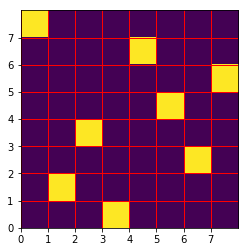

In [85]:
vis_board(queens)

For a $3 \times 3$ board, no solution can be found.

In [88]:
queens = place_queens(3)

no solution
